In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher


In [2]:
rsi_threshold = 75

In [3]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [4]:
exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

#df['macd'] = exp1-exp2
#df['signal'] = macd.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()
df['macd'] = macd-signal

print(signal.shape)
print(macd.shape)

(379,)
(379,)


C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


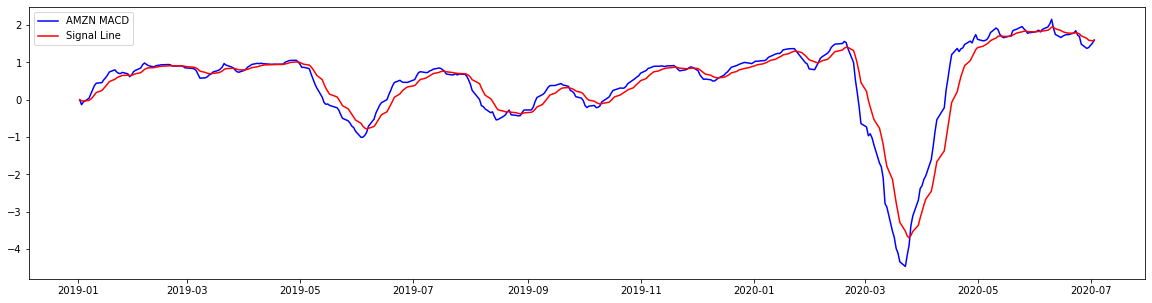

In [5]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, macd, label='AMZN MACD', color = 'b')
plt.plot(df.Date, signal, label='Signal Line', color='r')
plt.legend(loc='upper left')
plt.show()


In [6]:
pd.set_option('max.rows',None)
df[df.Date>=pd.to_datetime('2020-1-1')].head(100)

,Date,Open,High,Low,Close,Adj Close,Volume,macd
251,2020-01-02,70.290001,70.720001,70.150002,70.720001,70.602570,20800,0.117710
252,2020-01-03,69.900002,70.519997,69.900002,70.199997,70.083435,37800,0.092932
253,2020-01-06,69.529999,70.570000,69.529999,70.570000,70.452820,28600,0.087594
254,2020-01-07,70.529999,70.750000,70.430000,70.570000,70.452820,9500,0.070910
255,2020-01-08,70.480003,71.419998,70.480003,71.059998,70.942001,23100,0.079096
256,2020-01-09,71.730003,71.830002,71.349998,71.690002,71.570961,29700,0.111197
257,2020-01-10,72.050003,72.050003,71.500000,71.550003,71.431198,15200,0.107210
258,2020-01-13,71.860001,72.360001,71.760002,72.330002,72.209900,22900,0.139282
259,2020-01-14,72.330002,72.379997,72.000000,72.029999,71.910393,20300,0.123032
260,2020-01-15,72.180000,72.419998,71.930000,72.019997,71.900414,22600,0.095574


In [7]:
a = macd.values-signal.values
a.shape

(379,)

In [8]:
df['macd'] = macd-signal
df['buy'] = df.macd>0
df.buy = df.buy.astype(int)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0.209680,1
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0.251201,1
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0.250104,1
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0.210932,1
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0.229241,1


In [9]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)       

In [10]:
len(df_sig)

33

In [11]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [12]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy,chg_pct
0,2019-01-07,51.96,52.6,51.85,52.36,51.8383,84800,0.0565482,1,NaN
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994
2,2019-01-30,54.03,54.94,53.92,54.78,54.2342,65000,0.0057233,1,2.44997
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954
4,2019-03-15,58.61,59.02,58.52,58.81,58.224,44900,0.036206,1,3.83122
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105
6,2019-04-02,60.21,60.42,60.08,60.4,59.7982,11600,0.0268894,1,2.63382
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059
8,2019-06-07,58.88,59.78,58.88,59.67,59.0754,55000,0.0588734,1,-4.46686
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117


In [13]:
df_sig1 = df_sig[df_sig.buy==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy,chg_pct
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117
11,2019-08-23,61.2,61.7,59.51,59.6,59.3788,101700,-0.0691068,0,-3.35658
13,2019-09-24,62.78,62.95,61.46,61.66,61.4312,98700,-0.0596464,0,0.0974058
15,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,5.15431
17,2019-12-02,66.93,66.93,66.2,66.47,66.2233,29000,-0.0548571,0,-1.54051
19,2020-01-27,71.24,71.79,70.5,71.42,71.3014,97300,-0.146358,0,4.17153


In [14]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [15]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct/100)-1)

33.53601240977313

In [16]:
df_sig1.chg_pct.sum()

30.490214147837605

<h3> Calculate RSI

In [17]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [18]:
chg = df.Close-df.Close.shift(1)
N=14
df['RSI']=np.empty(df.shape[0])
df.RSI = np.nan
i=0
while((i+N) <= df.shape[0]):
    window = chg[i:i+N]
    pos_chg = window[window>0].sum()/N
    neg_chg = abs(window[window<0].sum())/N
    RS = pos_chg/neg_chg    
    df['RSI'][i+N] = 100-(100/(1+RS))
    i+=1

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
df.RSI.min()

21.50223747994295

In [20]:
df.RSI.max()

91.81283001610961

In [21]:
df['buy_rsi'] = df.RSI<=rsi_threshold
df.buy_rsi = df.buy_rsi.astype(int)
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,buy_rsi
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,NaN,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,NaN,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,NaN,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,NaN,0
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,NaN,0
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,NaN,0
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,NaN,0
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,NaN,0
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,NaN,0
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,NaN,0


In [22]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_rsi[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_rsi[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

In [23]:
len(df_sig)

39

In [24]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [25]:
len(df_sig)

39

In [26]:
df_sig['chg_pct_rsi'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [27]:
len(df_sig)

39

In [28]:
df_sig.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,buy_rsi,chg_pct_rsi
0,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,71.3188,1,NaN
1,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,76.7105,0,1.12254
2,2019-01-25,54.3,54.76,54.3,54.62,54.0758,66300,69.2174,1,1.05458
3,2019-02-20,56.84,57.1,56.56,56.84,56.2736,64400,79.5139,0,4.06445
4,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,72.9911,1,-0.351867
5,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,82.6445,0,1.6243
6,2019-03-07,57,57.09,56.34,56.54,55.9766,79200,66.6666,1,-1.77206
7,2019-03-22,60.14,60.21,58.99,59.01,58.422,82700,75.9398,0,4.36858
8,2019-03-25,58.79,59.01,58.49,58.91,58.323,55200,61.2121,1,-0.169459
9,2019-04-12,61.4,61.4,61.23,61.35,60.7387,8500,77.7487,0,4.14191


In [29]:
df_sig1 = df_sig[df_sig.buy_rsi==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,buy_rsi,chg_pct_rsi
1,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,76.7105,0,1.12254
3,2019-02-20,56.84,57.1,56.56,56.84,56.2736,64400,79.5139,0,4.06445
5,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,82.6445,0,1.6243
7,2019-03-22,60.14,60.21,58.99,59.01,58.422,82700,75.9398,0,4.36858
9,2019-04-12,61.4,61.4,61.23,61.35,60.7387,8500,77.7487,0,4.14191
11,2019-06-21,61.75,62.15,61.75,61.88,61.6503,31600,78.8944,0,-0.370311
13,2019-07-04,62.98,63.14,62.82,63.14,62.9057,22500,76.5343,0,3.37262
15,2019-07-17,63.44,63.52,63.14,63.14,62.9057,28600,76.1906,0,1.36458
17,2019-09-16,62.62,62.83,62.58,62.78,62.547,35200,78.115,0,-0.648837
19,2019-11-08,65.62,65.91,65.5,65.91,65.6654,8200,75.9152,0,4.48637


In [30]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [31]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct_rsi/100)-1)

48.71702249387357

In [32]:
df_sig1.chg_pct_rsi.sum()

41.374308665891334

<H3> MACD and RSI as combined indicator

In [33]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [34]:
exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

#df['macd'] = exp1-exp2
#df['signal'] = macd.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()
df['macd'] = macd-signal

print(signal.shape)
print(macd.shape)

(379,)
(379,)


In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166


In [36]:
df['macd'] = macd-signal
df['buy_macd'] = df.macd>0
df.buy_macd = df.buy_macd.astype(int)
chg_pct = 100*(df.Close-df.Close.shift(1))/df.Close.shift(1)
chg = df.Close-df.Close.shift(1)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1


In [37]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_macd[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_macd[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T) 

In [38]:
len(df_sig)

33

In [39]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [40]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [41]:
df_sig1 = df_sig[df_sig.buy_macd==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,chg_pct
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117
11,2019-08-23,61.2,61.7,59.51,59.6,59.3788,101700,-0.0691068,0,-3.35658
13,2019-09-24,62.78,62.95,61.46,61.66,61.4312,98700,-0.0596464,0,0.0974058
15,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,5.15431
17,2019-12-02,66.93,66.93,66.2,66.47,66.2233,29000,-0.0548571,0,-1.54051
19,2020-01-27,71.24,71.79,70.5,71.42,71.3014,97300,-0.146358,0,4.17153


In [42]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [43]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct/100)-1)

33.53601240977313

In [44]:
N=14
df['RSI']=np.empty(df.shape[0])
df.RSI = np.nan
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,NaN
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,NaN


In [45]:
chg_pct = 100*(df.Close-df.Close.shift(1))/df.Close.shift(1)
chg = df.Close-df.Close.shift(1)
print(df.shape)
print(chg.shape)
print(N)

(379, 10)
(379,)
14


In [46]:
i=0
while((i+N) <= df.shape[0]):
    #import pdb
    #pdb.set_trace()
    window = chg[i:i+N]
    pos_chg = window[window>0].sum()/N
    neg_chg = abs(window[window<0].sum())/N
    RS = pos_chg/neg_chg    
    df['RSI'][i+N] = 100-(100/(1+RS))
    i+=1

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,NaN
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,NaN
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0.209680,1,NaN
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0.251201,1,NaN
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0.250104,1,NaN
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0.210932,1,NaN
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0.229241,1,NaN


In [48]:
df.RSI.min()

21.50223747994295

In [49]:
df.RSI.max()

91.81283001610961

In [50]:
rsi_threshold

75

In [51]:
df['buy_rsi'] = df.RSI<= rsi_threshold
df.buy_rsi = df.buy_rsi.astype(int)
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,NaN,0
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,NaN,0
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0.209680,1,NaN,0
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0.251201,1,NaN,0
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0.250104,1,NaN,0
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0.210932,1,NaN,0
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0.229241,1,NaN,0


In [52]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_rsi[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_rsi[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

In [53]:
len(df_sig)

39

In [54]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [55]:
len(df_sig)

39

In [56]:
df_sig['chg_pct_rsi'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [57]:
len(df_sig)

39

In [58]:
df_sig.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,chg_pct_rsi
0,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,0.155254,1,71.3188,1,NaN
1,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,0.0715493,1,76.7105,0,1.12254
2,2019-01-25,54.3,54.76,54.3,54.62,54.0758,66300,0.0824857,1,69.2174,1,1.05458
3,2019-02-20,56.84,57.1,56.56,56.84,56.2736,64400,0.0229522,1,79.5139,0,4.06445
4,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,72.9911,1,-0.351867
5,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,1.6243
6,2019-03-07,57,57.09,56.34,56.54,55.9766,79200,-0.140357,0,66.6666,1,-1.77206
7,2019-03-22,60.14,60.21,58.99,59.01,58.422,82700,0.0958546,1,75.9398,0,4.36858
8,2019-03-25,58.79,59.01,58.49,58.91,58.323,55200,0.0363918,1,61.2121,1,-0.169459
9,2019-04-12,61.4,61.4,61.23,61.35,60.7387,8500,0.0294896,1,77.7487,0,4.14191


In [59]:
df_sig1 = df_sig[df_sig.buy_rsi==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,chg_pct_rsi
1,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,0.0715493,1,76.7105,0,1.12254
3,2019-02-20,56.84,57.1,56.56,56.84,56.2736,64400,0.0229522,1,79.5139,0,4.06445
5,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,1.6243
7,2019-03-22,60.14,60.21,58.99,59.01,58.422,82700,0.0958546,1,75.9398,0,4.36858
9,2019-04-12,61.4,61.4,61.23,61.35,60.7387,8500,0.0294896,1,77.7487,0,4.14191
11,2019-06-21,61.75,62.15,61.75,61.88,61.6503,31600,0.395262,1,78.8944,0,-0.370311
13,2019-07-04,62.98,63.14,62.82,63.14,62.9057,22500,0.234143,1,76.5343,0,3.37262
15,2019-07-17,63.44,63.52,63.14,63.14,62.9057,28600,0.0398745,1,76.1906,0,1.36458
17,2019-09-16,62.62,62.83,62.58,62.78,62.547,35200,0.204234,1,78.115,0,-0.648837
19,2019-11-08,65.62,65.91,65.5,65.91,65.6654,8200,0.150162,1,75.9152,0,4.48637


In [60]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [61]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct_rsi/100)-1)

48.71702249387357

In [62]:
df_sig1.chg_pct_rsi.sum()

41.374308665891334

In [63]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,NaN,0
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,NaN,0


<h3> Buy and sell if both signals are on/off

In [64]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_rsi[i]==1) & (df.buy_macd[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_rsi[i]==0) & (df.buy_macd[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

In [65]:
len(df_sig)

11

In [66]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [67]:
df_sig['chg_pct_comb'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [68]:
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,chg_pct_comb
0,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,0.155254,1,71.3188,1,NaN
1,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,7.68943
2,2019-03-15,58.61,59.02,58.52,58.81,58.224,44900,0.036206,1,64.9164,1,2.17165
3,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,77.116,0,6.20642
4,2019-06-07,58.88,59.78,58.88,59.67,59.0754,55000,0.0588734,1,33.8028,1,-4.46686
5,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,75.3163,0,10.7759
6,2019-12-16,68.38,68.65,68.38,68.56,68.3055,15000,0.0553491,1,59.4204,1,3.72163
7,2020-06-04,76.63,77,75.87,76.17,76.0435,83600,-0.00962651,0,77.9626,0,11.0998
8,2020-06-05,76.52,77.85,76.5,77.69,77.561,90000,0.0453094,1,72,1,1.99554
9,2020-06-11,78.3,78.88,75.91,75.92,75.7939,231400,-0.0262446,0,79.5676,0,-2.27829


In [69]:
df_sig1 = df_sig[(df_sig.buy_rsi==0) & (df_sig.buy_macd==0)]
print(df_sig1.shape)
df_sig1

(5, 12)


,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,chg_pct_comb
1,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,7.68943
3,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,77.116,0,6.20642
5,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,75.3163,0,10.7759
7,2020-06-04,76.63,77,75.87,76.17,76.0435,83600,-0.00962651,0,77.9626,0,11.0998
9,2020-06-11,78.3,78.88,75.91,75.92,75.7939,231400,-0.0262446,0,79.5676,0,-2.27829


In [70]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [71]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct_comb/100)-1)

37.554083513640336

In [72]:
df_sig1.chg_pct_comb.sum()

33.49326423584162

<h3> Buy/sell if either is on/off

In [73]:
df['buy_either'] = df.buy_macd+df.buy_rsi
df[df.Date>=pd.to_datetime('2020-1-1')].head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either
251,2020-01-02,70.290001,70.720001,70.150002,70.720001,70.602570,20800,0.117710,1,81.818072,0,1
252,2020-01-03,69.900002,70.519997,69.900002,70.199997,70.083435,37800,0.092932,1,87.452434,0,1
253,2020-01-06,69.529999,70.570000,69.529999,70.570000,70.452820,28600,0.087594,1,77.985002,0,1
254,2020-01-07,70.529999,70.750000,70.430000,70.570000,70.452820,9500,0.070910,1,77.220004,0,1
255,2020-01-08,70.480003,71.419998,70.480003,71.059998,70.942001,23100,0.079096,1,76.493931,0,1
256,2020-01-09,71.730003,71.830002,71.349998,71.690002,71.570961,29700,0.111197,1,75.720091,0,1
257,2020-01-10,72.050003,72.050003,71.500000,71.550003,71.431198,15200,0.107210,1,78.348567,0,1
258,2020-01-13,71.860001,72.360001,71.760002,72.330002,72.209900,22900,0.139282,1,76.130138,0,1
259,2020-01-14,72.330002,72.379997,72.000000,72.029999,71.910393,20300,0.123032,1,77.435837,0,1
260,2020-01-15,72.180000,72.419998,71.930000,72.019997,71.900414,22600,0.095574,1,72.354857,1,2


In [74]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_either[i]>=1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_either[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

In [75]:
len(df_sig)

11

In [76]:
df.shape

(379, 12)

In [77]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.drop_duplicates().reset_index(drop=True)
df_sig.shape

(11, 12)

In [78]:
df_sig['chg_pct_comb'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [79]:
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,chg_pct_comb
0,2019-01-07,51.96,52.6,51.85,52.36,51.8383,84800,0.0565482,1,NaN,0,1,NaN
1,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,0,9.93125
2,2019-03-07,57,57.09,56.34,56.54,55.9766,79200,-0.140357,0,66.6666,1,1,-1.77206
3,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,77.116,0,0,10.4705
4,2019-05-02,62.34,62.62,61.78,62.11,61.4911,54000,-0.107238,0,70.0996,1,1,-0.560355
5,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,75.3163,0,0,6.42408
6,2019-11-22,66.21,66.27,65.92,66.13,65.8846,13400,-0.0705203,0,66.0376,1,1,0.0453843
7,2020-06-04,76.63,77,75.87,76.17,76.0435,83600,-0.00962651,0,77.9626,0,0,15.1822
8,2020-06-05,76.52,77.85,76.5,77.69,77.561,90000,0.0453094,1,72,1,2,1.99554
9,2020-06-11,78.3,78.88,75.91,75.92,75.7939,231400,-0.0262446,0,79.5676,0,0,-2.27829


In [80]:
df_sig1 = df_sig[(df_sig.buy_either==0)]
print(df_sig1.shape)
df_sig1

(5, 13)


,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,chg_pct_comb
1,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,-0.0334296,0,82.6445,0,0,9.93125
3,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,77.116,0,0,10.4705
5,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,75.3163,0,0,6.42408
7,2020-06-04,76.63,77,75.87,76.17,76.0435,83600,-0.00962651,0,77.9626,0,0,15.1822
9,2020-06-11,78.3,78.88,75.91,75.92,75.7939,231400,-0.0262446,0,79.5676,0,0,-2.27829


In [81]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

59.52845479345284

In [82]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct_comb/100)-1)

45.47344190964826

In [83]:
df_sig1.chg_pct_comb.sum()

39.72971452974704

<h3> RSI Optimization

In [84]:
thresholds = np.linspace(start = 10, stop = 80, num = 15)
thresholds

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80.])

In [85]:
#for i, thres in enumerate(thresholds):
#    print(i)
#    print(thres)


In [86]:
#import pdb
gain_loss = np.zeros(len(thresholds))
for k, thres in enumerate(thresholds):
    df.buy_rsi = df.RSI<= thres
    df.buy_rsi = df.buy_rsi.astype(int)
    
    state=0
    df_sig = []
    for i in range(df.shape[0]):
        if((df.buy_rsi[i]>=1) & (state==0)):
            state = 1
            df_sig.append(df.iloc[i,:].to_frame().T)
        if((df.buy_rsi[i]==0) & (state==1)):
            state=0
            df_sig.append(df.iloc[i].to_frame().T)
    if(not df_sig):
        print('list is empty')
    else:
        df_sig = pd.concat(df_sig, axis=0)
        df_sig = df_sig.drop_duplicates().reset_index(drop=True)
        df_sig['chg_pct'] = 100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
        df_sig = df_sig[df_sig.buy_rsi==0]
        gain_loss[k] = 100*(np.prod(1+df_sig.chg_pct/100)-1)       
   

list is empty
list is empty
list is empty


In [87]:
gain_loss

array([  0.        ,   0.        ,   0.        ,  -2.17479885,
       -12.04272096, -11.41822463, -10.99027494,  -9.02220421,
        -1.27156321,   3.59541195,  24.26233915,  36.60790283,
        53.97561965,  48.71702249,  46.5114094 ])

In [88]:
gain_loss.max()

53.97561964811444

In [89]:
gain_loss = np.zeros(len(thresholds))
for k, thres in enumerate(thresholds):
    df.buy_rsi = df.RSI<= thres
    df.buy_rsi = df.buy_rsi.astype(int)
    
    df.buy_either = df.buy_macd+df.buy_rsi
    
    state=0
    df_sig = []
    for i in range(df.shape[0]):
        if((df.buy_either[i]>=1) & (state==0)):
            state = 1
            df_sig.append(df.iloc[i,:].to_frame().T)
        if((df.buy_either[i]==0) & (state==1)):
            state=0
            df_sig.append(df.iloc[i].to_frame().T)
        
    df_sig = pd.concat(df_sig, axis=0)
    df_sig = df_sig.drop_duplicates().reset_index(drop=True)
    df_sig['chg_pct'] = 100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
    df_sig = df_sig[df_sig.buy_either==0]
    gain_loss[k] = 100*(np.prod(1+df_sig.chg_pct/100)-1)   
gain_loss

array([33.53601241, 33.53601241, 33.53601241, 30.63187275, 17.45464305,
       17.05271784, 22.41577158, 20.72203077, 26.78216564, 28.00334814,
       37.17377289, 48.18300543, 46.09657001, 45.47344191,  9.93124504])

In [90]:
gain_loss.max()

48.18300542718112

In [91]:
thresholds

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80.])

In [92]:
gain_loss = np.zeros(len(thresholds))
for k, thres in enumerate(thresholds):
    df.buy_rsi = df.RSI<= thres
    df.buy_rsi = df.buy_rsi.astype(int)
    
    df['buy_both'] = df.buy_macd*df.buy_rsi
    
    state=0
    df_sig = []
    for i in range(df.shape[0]):
        if((df.buy_both[i]==1) & (state==0)):
            state = 1
            df_sig.append(df.iloc[i,:].to_frame().T)
        if((df.buy_both[i]==0) & (state==1)):
            state=0
            df_sig.append(df.iloc[i].to_frame().T)
    if(not df_sig):
        print('list is empty')
    else:
        df_sig = pd.concat(df_sig, axis=0)
        df_sig = df_sig.drop_duplicates().reset_index(drop=True)
        df_sig['chg_pct'] = 100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
        df_sig = df_sig[df_sig.buy_both==0]
        gain_loss[k] = 100*(np.prod(1+df_sig.chg_pct/100)-1)   
gain_loss    

list is empty
list is empty
list is empty
list is empty
list is empty


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.05580865, -2.90463724,  0.63458997,  3.98782585,  3.83571398,
       17.90845416, 19.99245257, 31.45485595, 36.51342747, 35.21341145])

In [93]:
gain_loss.max()

36.51342747235362

In [94]:
best_thresh = thresholds[np.argmax(gain_loss)]
best_thresh

75.0

In [95]:
df.buy_rsi = df.RSI<= best_thresh
df.buy_rsi = df.buy_rsi.astype(int)

df['buy_both'] = df.buy_macd*df.buy_rsi


In [96]:
state=0
df_sig = []
import pdb

for i in range(df.shape[0]):
    
    if((df.buy_both[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_both[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.drop_duplicates().reset_index(drop=True)
df_sig['chg_pct'] = 100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
df_sig1 = df_sig[df_sig.buy_both==0]
gain_loss = 100*(np.prod(1+df_sig1.chg_pct/100)-1)   
gain_loss 

36.51342747235362

In [97]:
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,chg_pct
0,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,0.155254,1,71.3188,1,2,1,NaN
1,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,0.0715493,1,76.7105,0,2,0,1.12254
2,2019-01-25,54.3,54.76,54.3,54.62,54.0758,66300,0.0824857,1,69.2174,1,2,1,1.05458
3,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,58.9615,1,1,0,-2.10545
4,2019-01-30,54.03,54.94,53.92,54.78,54.2342,65000,0.0057233,1,51.5755,1,2,1,2.44997
5,2019-02-20,56.84,57.1,56.56,56.84,56.2736,64400,0.0229522,1,79.5139,0,2,0,3.7605
6,2019-03-15,58.61,59.02,58.52,58.81,58.224,44900,0.036206,1,64.9164,1,2,1,3.46587
7,2019-03-22,60.14,60.21,58.99,59.01,58.422,82700,0.0958546,1,75.9398,0,2,0,0.340073
8,2019-03-25,58.79,59.01,58.49,58.91,58.323,55200,0.0363918,1,61.2121,1,2,1,-0.169459
9,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,64.6697,1,1,0,-0.101854


<H3> MACD value changes

In [98]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN,0,0,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN,0,0,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN,0,0,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,NaN,0,1,0
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,NaN,0,1,0


In [136]:
df['macd_chg'] = df.macd-df.macd.shift(1)
df['macd_chg_abs'] = abs(df.macd_chg)
df['macd_chg_dir'] = df.macd_chg>0
df['macd_chg_dir'] = df['macd_chg_dir'].astype(int)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,macd_chg,macd_chg_abs,macd_chg_dir
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN,0,0,0,NaN,NaN,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,NaN,0,0,0,-0.106575,0.106575,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,NaN,0,0,0,0.078791,0.078791,1
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,0,NaN,0,1,0,0.084333,0.084333,1
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,0,NaN,0,1,0,0.082618,0.082618,1


In [137]:
#df[df.Date>=pd.to_datetime('2020-3-1-')].head(30)

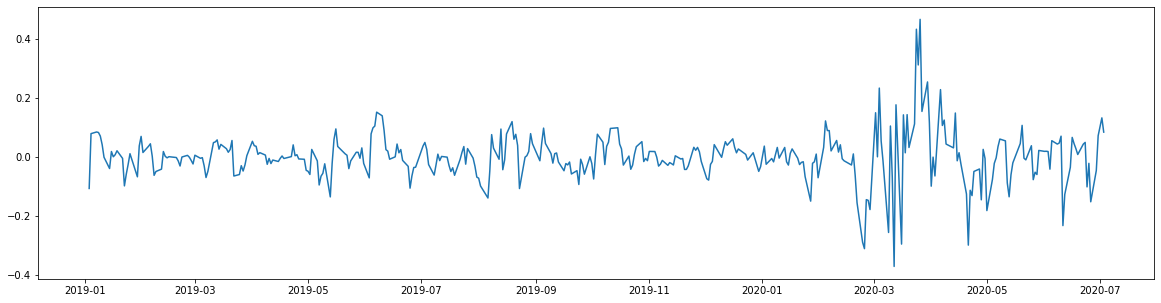

In [138]:
plt.figure(figsize=(20,5))
plt.plot(df.Date,df.macd_chg)

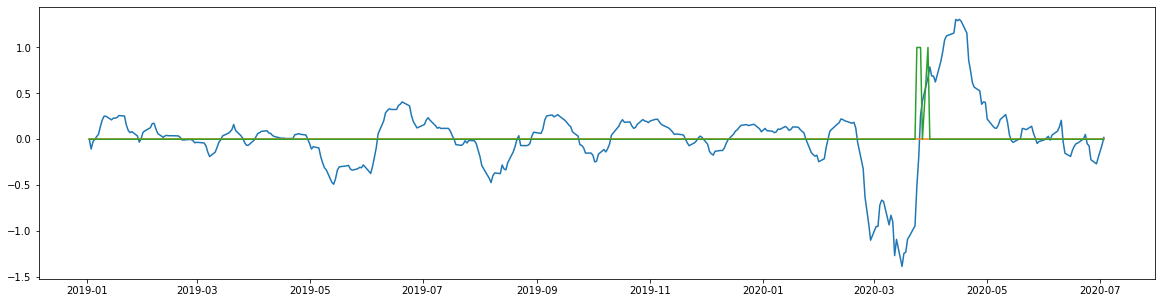

In [172]:
plt.figure(figsize=(20,5))
horizontal = np.zeros(df.shape[0])
macd_norm = (df.macd-df.macd.mean())/df.macd.std()
price_norm = (df.Close-df.Close.mean())/(df.Close.std())
plt.plot(df.Date, df.macd)
plt.plot(df.Date, horizontal)
plt.plot(df.Date, df.buy_macd)
#plt.plot(df.Date, price_norm)

In [146]:
df1 = df[df.macd_chg_dir==1].sort_values('macd_chg_abs', ascending=False)
df1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,macd_chg,macd_chg_abs,macd_chg_dir
310,2020-03-26,59.880001,62.959999,59.869999,62.770000,62.665771,502500,0.263780,1,38.683682,1,2,1,0.465089,0.465089,1
308,2020-03-24,58.200001,59.650002,57.740002,59.540001,59.441135,174500,-0.512248,0,35.085765,1,1,0,0.431725,0.431725,1
309,2020-03-25,59.959999,61.750000,58.380001,59.230000,59.131649,392700,-0.201310,0,37.225331,1,1,0,0.310939,0.310939,1
312,2020-03-30,60.980000,62.799999,60.700001,62.610001,62.506039,222100,0.671079,1,46.442115,1,2,1,0.253479,0.253479,1
294,2020-03-04,69.730003,71.400002,69.089996,71.400002,71.281441,79200,-0.718072,0,29.836973,1,1,0,0.232750,0.232750,1
317,2020-04-06,62.000000,64.320000,61.709999,64.110001,64.003548,189600,0.851579,1,57.933306,1,2,1,0.227582,0.227582,1
301,2020-03-13,60.619999,63.880001,58.000000,62.950001,62.845474,190100,-1.092025,0,26.378059,1,1,0,0.176232,0.176232,1
311,2020-03-27,60.990002,62.169998,60.230000,60.310001,60.209858,275300,0.417600,1,44.420737,1,2,1,0.153820,0.153820,1
109,2019-06-07,58.880001,59.779999,58.880001,59.669998,59.075439,55000,0.058873,1,33.802800,1,2,1,0.151390,0.151390,1
292,2020-03-02,68.250000,70.750000,67.500000,70.750000,70.632523,171500,-0.951235,0,22.743685,1,1,0,0.149369,0.149369,1


In [163]:
df2 = df[df.macd_chg_dir==0].sort_values('macd_chg_abs', ascending=False)
df2[['Date','Close','macd','macd_chg']].head(10)

,Date,Close,macd,macd_chg
300,2020-03-12,57.810001,-1.268257,-0.370232
288,2020-02-25,70.449997,-0.631556,-0.310091
327,2020-04-21,66.790001,0.859535,-0.298167
302,2020-03-16,55.450001,-1.386685,-0.294660
287,2020-02-24,72.550003,-0.321465,-0.288618
297,2020-03-09,63.500000,-0.933310,-0.255389
363,2020-06-11,75.919998,-0.026245,-0.232161
335,2020-05-01,68.970001,0.220234,-0.181374
291,2020-02-28,67.500000,-1.100603,-0.177939
286,2020-02-21,75.379997,-0.032846,-0.154725


In [154]:
df.buy_macd = ((df.macd_chg_dir==1) & (df.macd_chg>=0.25))
df.buy_macd = df.buy_macd.astype(int)
df['sell_macd'] = ((df.macd_chg_dir == 0) & (df.macd_chg_abs >= 0.25))
df.sell_macd = df.sell_macd.astype(int)
df[df.buy_macd==1]

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,macd_chg,macd_chg_abs,macd_chg_dir,sell_macd
308,2020-03-24,58.200001,59.650002,57.740002,59.540001,59.441135,174500,-0.512248,1,35.085765,1,1,0,0.431725,0.431725,1,0
309,2020-03-25,59.959999,61.750000,58.380001,59.230000,59.131649,392700,-0.201310,1,37.225331,1,1,0,0.310939,0.310939,1,0
310,2020-03-26,59.880001,62.959999,59.869999,62.770000,62.665771,502500,0.263780,1,38.683682,1,2,1,0.465089,0.465089,1,0
312,2020-03-30,60.980000,62.799999,60.700001,62.610001,62.506039,222100,0.671079,1,46.442115,1,2,1,0.253479,0.253479,1,0


In [155]:
df[df.sell_macd==1]

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,macd_chg,macd_chg_abs,macd_chg_dir,sell_macd
287,2020-02-24,72.500000,73.389999,71.709999,72.550003,72.429535,92400,-0.321465,0,69.966969,1,1,0,-0.288618,0.288618,0,1
288,2020-02-25,73.120003,73.199997,70.330002,70.449997,70.333015,129000,-0.631556,0,48.375120,1,1,0,-0.310091,0.310091,0,1
297,2020-03-09,64.800003,65.739998,63.490002,63.500000,63.394562,581600,-0.933310,0,31.263304,1,1,0,-0.255389,0.255389,0,1
300,2020-03-12,61.450001,62.070000,57.730000,57.810001,57.714008,477100,-1.268257,0,30.027547,1,1,0,-0.370232,0.370232,0,1
302,2020-03-16,57.000000,60.090000,55.430000,55.450001,55.357929,169600,-1.386685,0,37.848098,1,1,0,-0.294660,0.294660,0,1
327,2020-04-21,68.610001,68.699997,66.330002,66.790001,66.679100,380400,0.859535,0,68.651677,1,2,1,-0.298167,0.298167,0,1


In [160]:
df_sig = pd.concat([df[df.buy_macd==1], df[df.sell_macd==1]], axis=0).reset_index(drop=True)
df_sig = df_sig.sort_values('Date')
df_sig = df_sig[['Date','Close','macd','macd_chg','buy_macd','sell_macd']]
df_sig

,Date,Close,macd,macd_chg,buy_macd,sell_macd
4,2020-02-24,72.550003,-0.321465,-0.288618,0,1
5,2020-02-25,70.449997,-0.631556,-0.310091,0,1
6,2020-03-09,63.500000,-0.933310,-0.255389,0,1
7,2020-03-12,57.810001,-1.268257,-0.370232,0,1
8,2020-03-16,55.450001,-1.386685,-0.294660,0,1
0,2020-03-24,59.540001,-0.512248,0.431725,1,0
1,2020-03-25,59.230000,-0.201310,0.310939,1,0
2,2020-03-26,62.770000,0.263780,0.465089,1,0
3,2020-03-30,62.610001,0.671079,0.253479,1,0
9,2020-04-21,66.790001,0.859535,-0.298167,0,1


In [114]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_macd[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_macd[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T) 

In [115]:
len(df_sig)

6

In [116]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [117]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [118]:
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,RSI,buy_rsi,buy_either,buy_both,macd_chg,chg_pct
0,2019-06-07,58.88,59.78,58.88,59.67,59.0754,55000,0.0588734,1,33.8028,1,2,1,0.15139,NaN
1,2019-06-10,60.11,60.86,60.11,60.3,59.6992,51400,0.197866,0,45.509,1,2,1,0.138993,1.05581
2,2020-03-26,59.88,62.96,59.87,62.77,62.6658,502500,0.26378,1,38.6837,1,2,1,0.465089,4.09619
3,2020-03-31,62.47,63.7,61.77,62.02,61.917,258000,0.787773,0,45.2576,1,2,1,0.116693,-1.19484
4,2020-04-06,62,64.32,61.71,64.11,64.0035,189600,0.851579,1,57.9333,1,2,1,0.227582,3.36988
5,2020-04-07,66.19,66.19,63.89,63.89,63.7839,306200,0.957893,0,58.912,1,2,1,0.106314,-0.343163


In [41]:
df_sig1 = df_sig[df_sig.buy_macd==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy_macd,chg_pct
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117
11,2019-08-23,61.2,61.7,59.51,59.6,59.3788,101700,-0.0691068,0,-3.35658
13,2019-09-24,62.78,62.95,61.46,61.66,61.4312,98700,-0.0596464,0,0.0974058
15,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,5.15431
17,2019-12-02,66.93,66.93,66.2,66.47,66.2233,29000,-0.0548571,0,-1.54051
19,2020-01-27,71.24,71.79,70.5,71.42,71.3014,97300,-0.146358,0,4.17153
